In [13]:
import torch
from torchvision.transforms import functional as F
from PIL import Image
import os

ROOT_DIR = "C:\\Adrianov\\Projects\\Project-Satanael\\"
DEMO_DIR = os.path.join(ROOT_DIR, 'attack_demo')

In [9]:
v5_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
v5_model.eval()

Using cache found in C:\Users\adria/.cache\torch\hub\ultralytics_yolov5_master


requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
   ---------------------------------------- 3/3 [gitpython]

requirements: AutoUpdate success  5.2s
WARNING requirements: Restart runtime or rerun command for updates to take effect



YOLOv5  2025-7-15 Python-3.13.3 torch-2.6.0+cpu CPU

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 15.5MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [15]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class_names = v5_model.names
label_colors = {i: (random.random(), random.random(), random.random()) for i in range(len(class_names))}

def yolo_plot_predictions(image, preds, threshold=0.7):
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(image)

    for *box, conf, cls in preds:
        if conf >= threshold:
            x1, y1, x2, y2 = box
            label = int(cls.item())
            color = label_colors[label]
            label_name = class_names[label]

            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                     linewidth=2, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1, f"{label_name}: {conf:.2f}", color='white',
                    bbox=dict(facecolor=color, alpha=0.5, pad=2), fontsize=10)

    plt.axis('off')
    plt.tight_layout()
    plt.show()

## Naturalistic Patch Attack

### Baseline Unattacked Images

C:\Users\adria/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


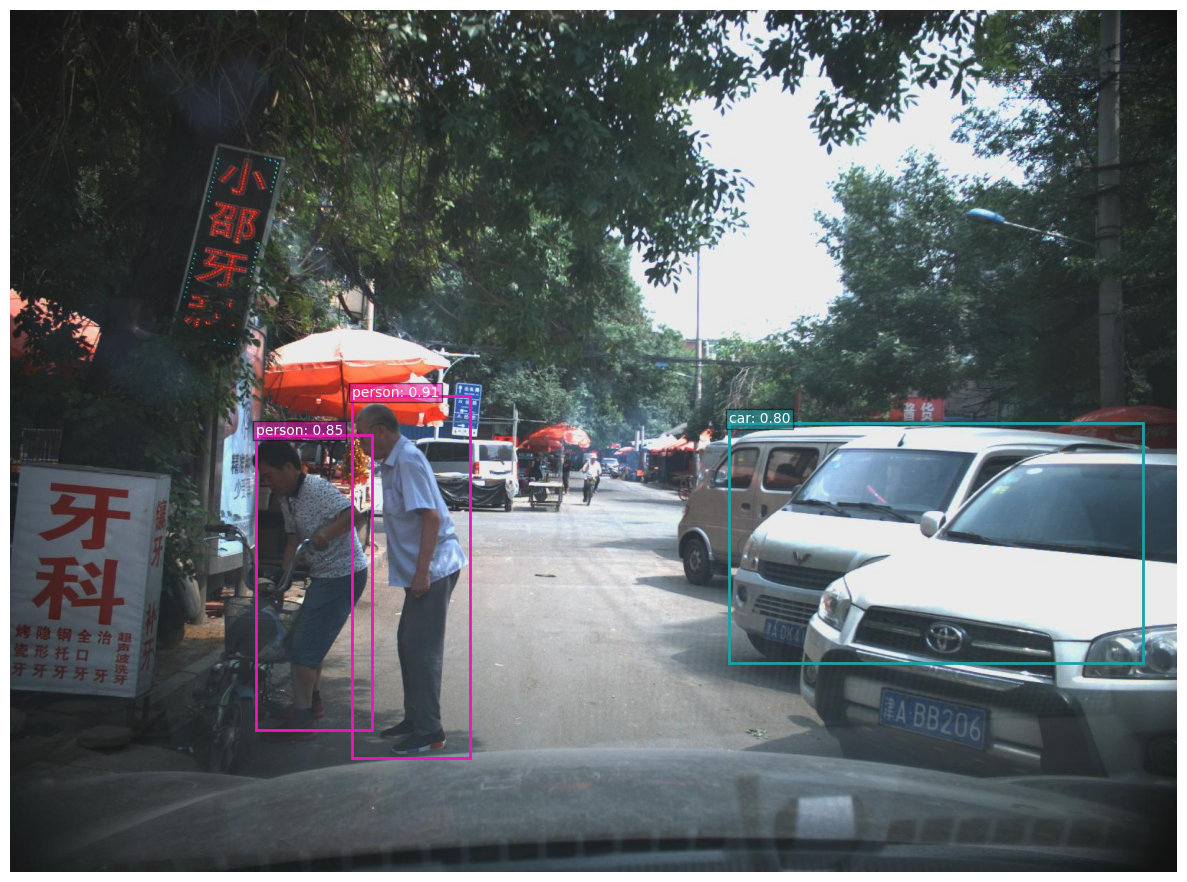

In [18]:
%matplotlib inline

natpatch_ex1 = "1497507290696(1).png"
image_path = os.path.join(DEMO_DIR, natpatch_ex1)
image = Image.open(image_path).convert("RGB")
image_tensor = F.to_tensor(image)  # C x H x W tensor

results = v5_model(image)

preds = results.xyxy[0]

yolo_plot_predictions(image, preds)

## Attacked Image #1

C:\Users\adria/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


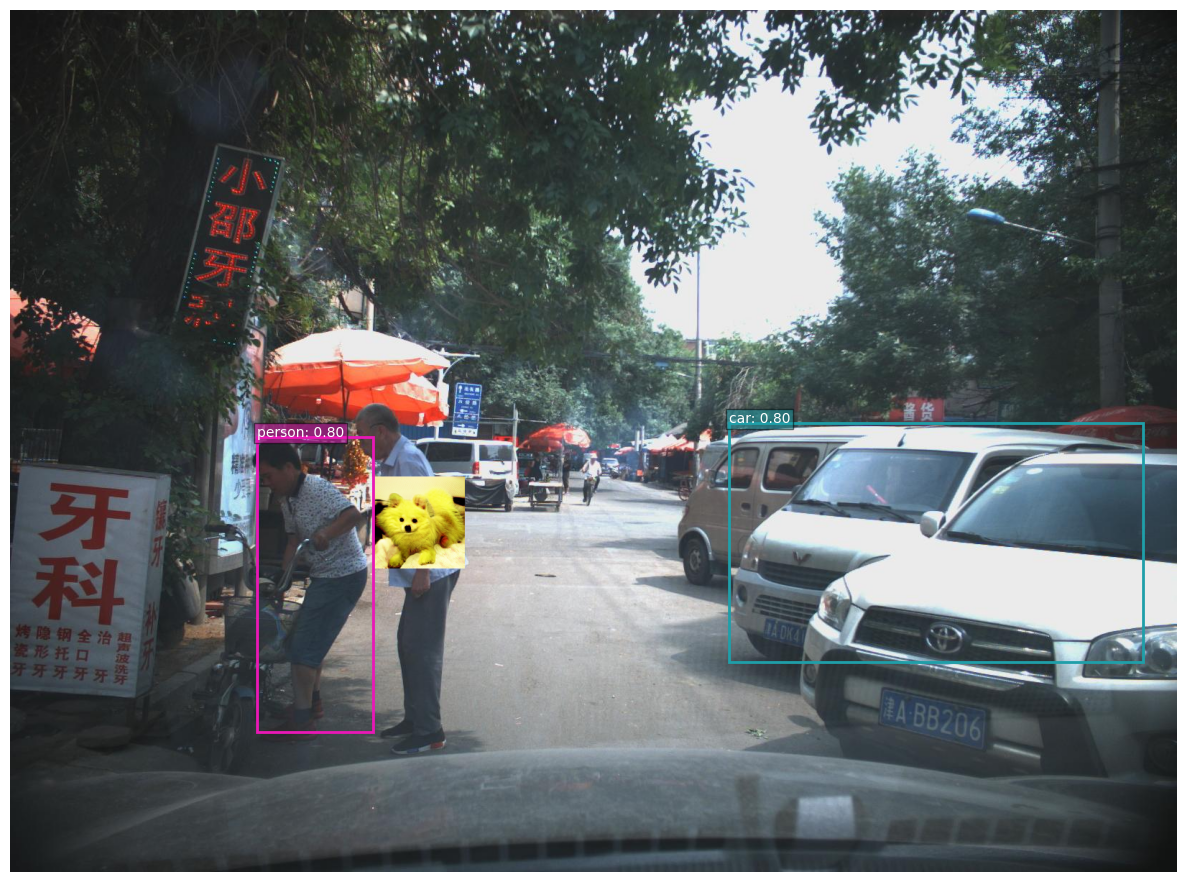

In [20]:
%matplotlib inline

natpatch_ex2 = "1497507290696.png"
image_path = os.path.join(DEMO_DIR, natpatch_ex2)
image = Image.open(image_path).convert("RGB")
image_tensor = F.to_tensor(image)  # C x H x W tensor

results = v5_model(image)

preds = results.xyxy[0]

yolo_plot_predictions(image, preds)

### Attacked Image 2

C:\Users\adria/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


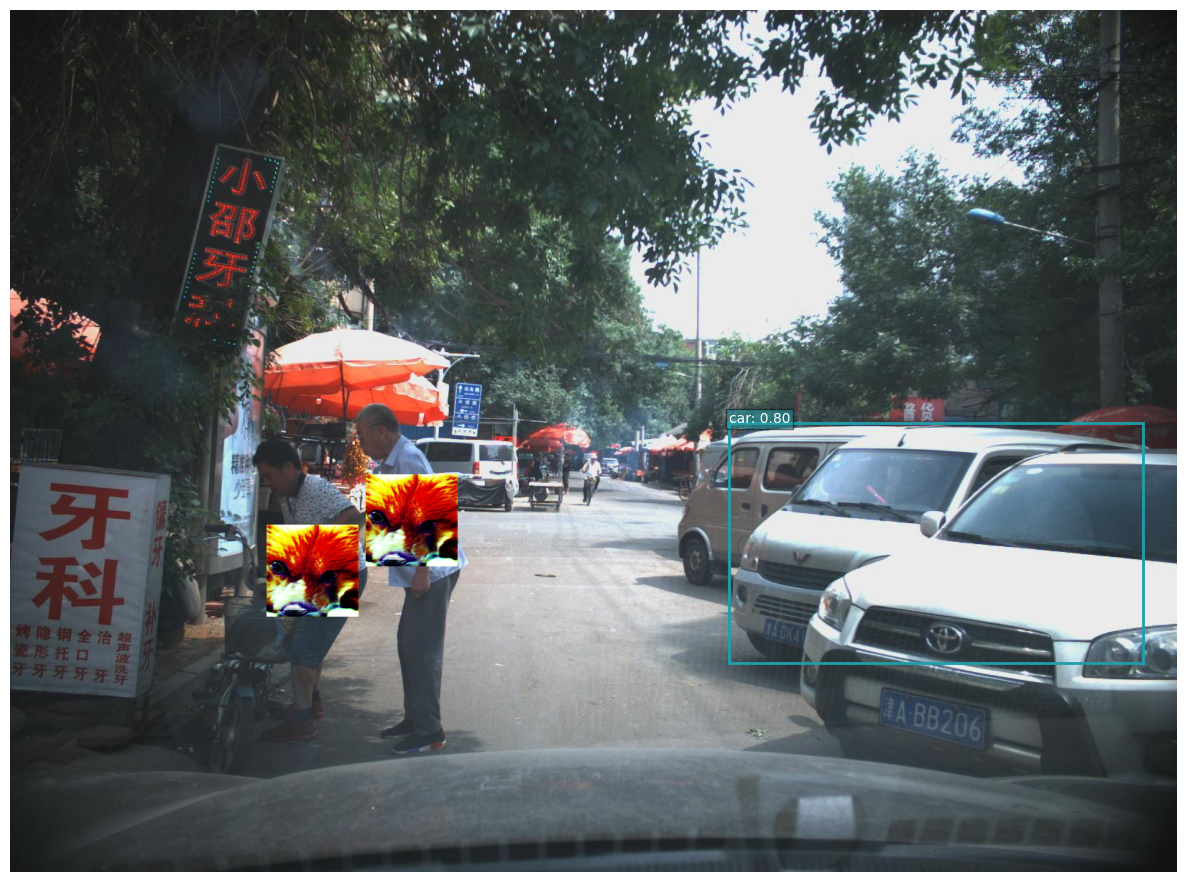

In [24]:
%matplotlib inline

natpatch_ex3 = "1497507290696(5).png"
image_path = os.path.join(DEMO_DIR, natpatch_ex3)
image = Image.open(image_path).convert("RGB")
image_tensor = F.to_tensor(image)  # C x H x W tensor

results = v5_model(image)

preds = results.xyxy[0]

yolo_plot_predictions(image, preds)

## T-SEA Patch

### Unattacked Image
A black patch of the same size is put over the victim object to ensure the lack of detection does not arise from mere occlusion

In [27]:
%matplotlib inline

image_path = os.path.join(DEMO_DIR, "1497507290696(8).png")
image = Image.open(image_path).convert("RGB")
image_tensor = F.to_tensor(image)  # C x H x W tensor

results = v5_model(image)

preds = results.xyxy[0]

yolo_plot_predictions(image, preds)

C:\Users\adria/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


### Attacked Image #1

In [28]:
%matplotlib inline

image_path = os.path.join(DEMO_DIR, "1497507290696(7).png")
image = Image.open(image_path).convert("RGB")
image_tensor = F.to_tensor(image)  # C x H x W tensor

results = v5_model(image)

preds = results.xyxy[0]

yolo_plot_predictions(image, preds)

C:\Users\adria/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


## Benchmarking